In [1]:
import seaborn
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
import seaborn
import cmocean
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns


# directory to save figures
figdir = "/home/rfrost/vorticity_figures/"
# absolute path to directory with probability density function data
pdf_dir = "/home/rfrost/simulations/nc/"
# simulation to analyze
sims = ["full_step_6", "full_step_9", "full_step_12", "full_step_15"]
# height in meters to be plot
height = 6
# start and end timesteps
t0 = 576000
t1 = 1152000
# start and end in hours
t0hr = t0 * 0.05 / 3600
t1hr = t1 * 0.05 / 3600
# spacing of output
dt = 1000

# full path to pdf file
pdf_dir = f"{pdf_dir}{t0}_{t1}_vort_pdf_plot_params_{height}m.nc"
# lists to store stats, roll factor, and length scales
s_all, vort_all, vort_ac_all, vort_ls_all = [], [], [], []
# loop over sims
for sim in sims:
    dnc = f"/home/rfrost/simulations/nc/{sim}/"
    # volumetric stats
    s = xr.open_dataset(f"{dnc}{t0}_{t1}_stats.nc")
    s["time"] = s.time / 3600 + t0hr
    s_all.append(s)
    # vorticity stats
    vort = xr.open_dataset(f"{dnc}{t0}_{t1}_vort.nc")
    vort["time"] = vort.time / 3600 + t0hr
    vort_all.append(vort)
    # vorticity autocorrelation
    vort_ac = xr.open_dataset(f"{dnc}{t0}_{t1}_vort_autocorr.nc")
    vort_ac["time"] = vort_ac.time / 3600 + t0hr
    vort_ac_all.append(vort_ac)
    # vorticity length scales
    vort_ls = xr.open_dataset(f"{dnc}{t0}_{t1}_vort_ls.nc")
    vort_ls["time"] = vort_ls.time / 3600 + t0hr
    vort_ls_all.append(vort_ls)


# Plotting set up
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
rc('font', family='sans-serif')
rc('font', weight='normal', size=20)
rc('figure', facecolor='white')
ug_list = ["6", "9", "12", "15"]
time_colors = ["black", "red", "red", "blue", "blue"]
ug_colors = seaborn.color_palette("flare", 4)
linestyle = ["solid","solid","--","solid","--"]


# Eddy turnover for normalization
T_L = (906.23 + 923.55 + 937.68 + 960.66) / 4
tb = -1
tc = 5
td = 11
te = 17
tf = 23
tlmax = max((s_all[0].time-10)*3600/T_L)
tlmin = min((s_all[0].time-10)*3600/T_L)
jttl = [tb, tc, td, te, tf]
jtall = [abs(((s_all[0].time.values-10)*3600)/T_L - jttl[jt]).argmin() for jt in range(len(jttl))]

### End member sfc $\zeta$ cross sections

Saved to: /home/rfrost/vorticity_figures/end_member_cross_section.pdf


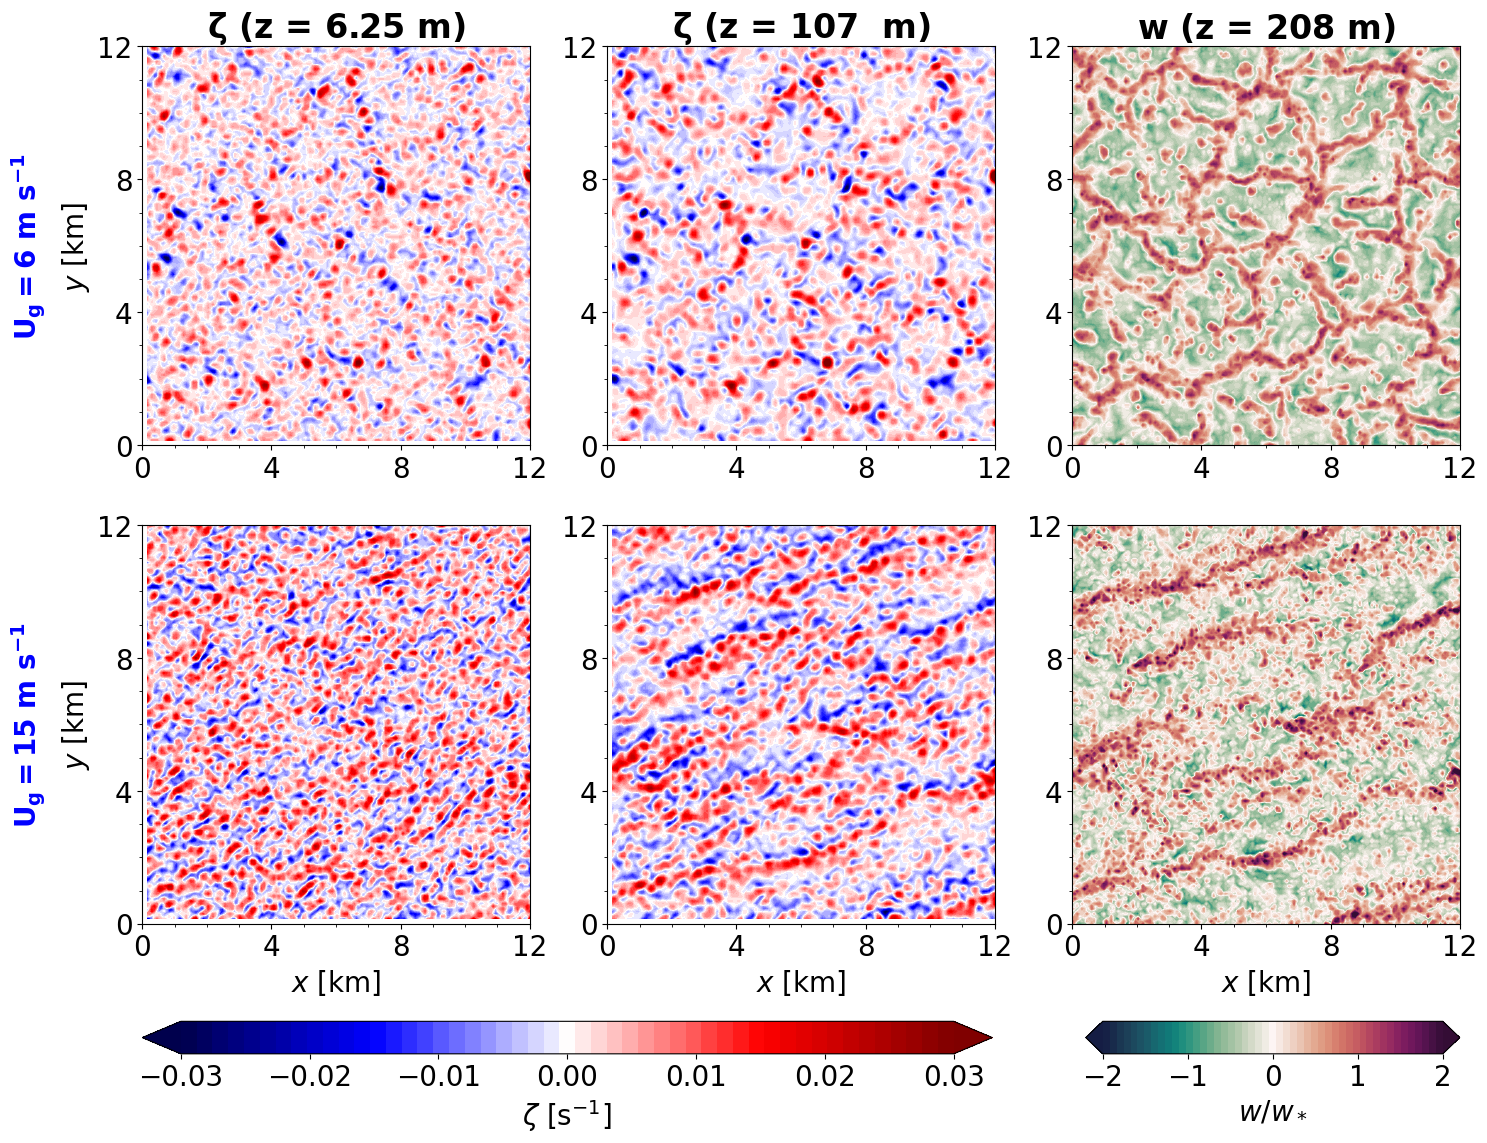

In [3]:
fig = plt.figure(figsize=(17,13))

gs1 = GridSpec(2,3, top=0.95, bottom=0.275)
ax1 = fig.add_subplot(gs1[0,0])
ax2 = fig.add_subplot(gs1[1,0])
ax3 = fig.add_subplot(gs1[0,1])
ax4 = fig.add_subplot(gs1[1,1])
ax5 = fig.add_subplot(gs1[0,2])
ax6 = fig.add_subplot(gs1[1,2])
gs2 = GridSpec(1,1, top=0.20, bottom=0.175, left=0.125, right=0.625)
ax7 = fig.add_subplot(gs2[:])
gs3 = GridSpec(1,1, top=0.20, bottom=0.175, left=0.68, right=0.9)
ax8 = fig.add_subplot(gs3[:])

x, y = s_all[0].x/1000, s_all[0].y/1000

# clevs = [-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
#        -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25  ,  0.25,
#         0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
#         2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.]
clevs = np.linspace(-0.03, 0.03, 50)
clevw = np.linspace(-2,2,50)
cmapw = cmocean.cm.curl
cmap = mpl.cm.seismic

cf = ax1.contourf(x, y, vort_all[0].omega_z[359,:,:,0].rolling(x=3,y=3).mean().T, clevs, cmap=cmap, extend="both")
ax1.text(-3.5, 6, "$\\bf{U_g = 6}$ m s$\\bf{^{-1}}$", rotation=90, 
         va="center", ha="center", fontweight="bold", c='blue')
ax1.set_title("$\\bf{\zeta}$ (z = 6.25 m)")

ax2.contourf(x, y, vort_all[3].omega_z[132,:,:,0].rolling(x=3,y=3).mean().T, clevs, cmap=cmap, extend="both")
ax2.text(-3.5, 6, "$\\bf{U_g = 15}$ m s$\\bf{^{-1}}$", rotation=90, 
         va="center", ha="center", fontweight="bold", c='blue')

ax3.contourf(x, y, vort_all[0].omega_z[359,:,:,8].rolling(x=3,y=3).mean().T, clevs, cmap=cmap, extend="both")
ax3.set_title("$\\bf{\zeta}$ (z = 107  m)")
ax4.contourf(x, y, s_all[3].zeta[132,:,:,8].rolling(x=3,y=3).mean().T, clevs, cmap=cmap, extend="both")

cfw = ax5.contourf(x, y, s_all[0].w[359,:,:,16].T / s_all[0].wstar[359], clevw, cmap=cmapw, extend="both")
ax5.set_title("$\\bf{w}$ (z = 208 m)")
ax6.contourf(x, y, s_all[3].w[132,:,:,16].T / s_all[3].wstar[132], clevw, cmap=cmapw, extend="both")

cbar = plt.colorbar(cf, ax7, orientation="horizontal")
cbar.set_label("$\zeta$ [s$^{-1}$]")
cbar.set_ticks(np.arange(-0.03, 0.0301, 0.01))

cbar = plt.colorbar(cfw, ax8, orientation="horizontal")
cbar.set_label("$w / w_*$")
cbar.set_ticks(np.arange(-2,2.1,1))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for ax in axes:
    ax.xaxis.set_major_locator(MultipleLocator(4))
    ax.yaxis.set_major_locator(MultipleLocator(4))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    # ax.set_xlim(4,8)
    # ax.set_ylim(4,8)

ax1.set_ylabel("$y$ [km]")
ax2.set_ylabel("$y$ [km]")
ax2.set_xlabel("$x$ [km]")
ax4.set_xlabel("$x$ [km]")
ax6.set_xlabel("$x$ [km]")

dout = f"{figdir}end_member_cross_section.pdf"
plt.savefig(dout, dpi=150, bbox_inches='tight', format='pdf')
print(f"Saved to: {dout}")

### 4x5 sfc $\zeta$ cross sections

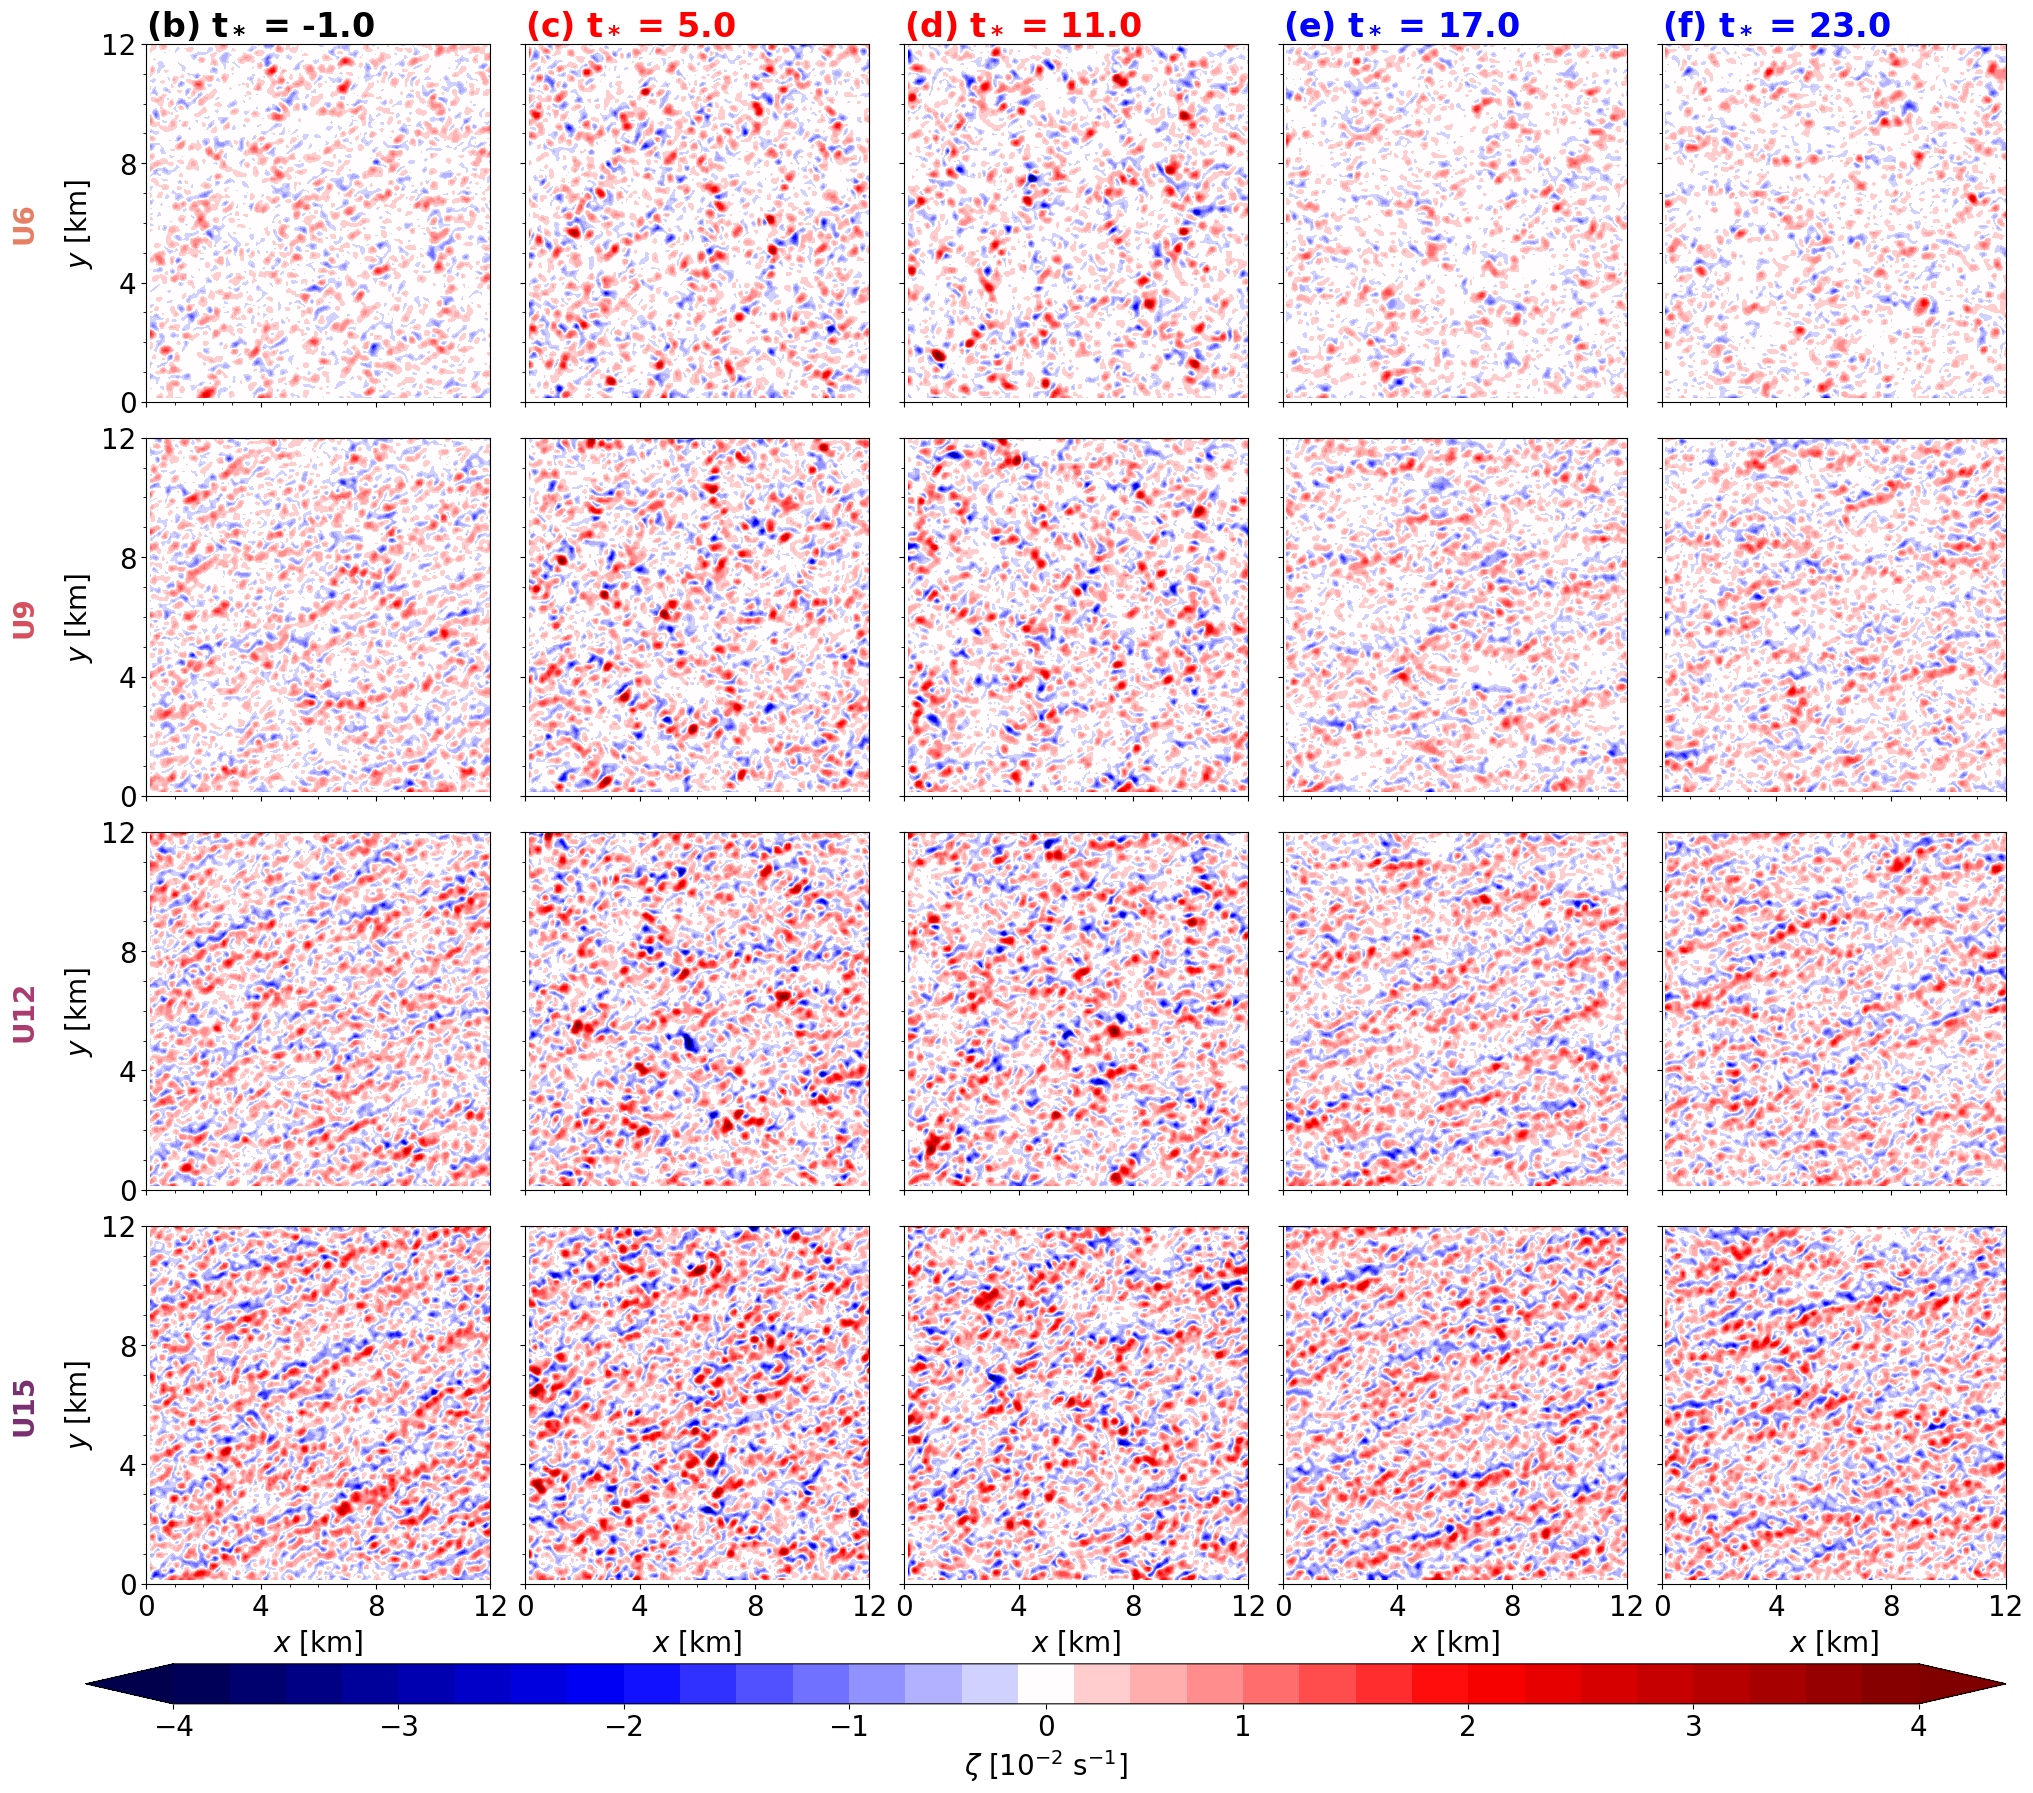

In [3]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(24,20), sharex=True, sharey=True)

# contourf plots
clevs = [-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.]

tavg = 3

# 6 m/s
sim = 0
time_values = [vort_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [vort_all[sim].zeta3[jtall[i]].rolling(x=tavg,y=tavg).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
lab = ["b", "c", "d", "e", "f"]
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T * 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    iax.set_title(f"({lab[j]}) $\\bf{{t_*}}$ = {round(((s_all[0].time[jtall[j]].values-10)*3600)/T_L,1)}", 
                  loc="left", c=time_colors[j])
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 9 m/s
sim = 1
time_values = [vort_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [vort_all[sim].zeta3[jtall[i]].rolling(x=tavg,y=tavg).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T * 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 12 m/s
sim = 2
time_values = [vort_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [vort_all[sim].zeta3[jtall[i]].rolling(x=tavg,y=tavg).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T * 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# 15 m/s
sim = 3
time_values = [vort_all[sim].time[jtall[i]].values for i in range(len(jtall))]
zeta3_values = [vort_all[sim].zeta3[jtall[i]].rolling(x=tavg,y=tavg).mean() for i in range(len(jtall))]
wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
zi_values = [s_all[sim].zi[jtall[i]] for i in range(len(jtall))]
x_values = s_all[sim].x
y_values = s_all[sim].y
for j, iax in enumerate(ax[sim,:]):
    cf = iax.contourf(x_values/1000, y_values/1000, 
                      zeta3_values[j][:,:,4].T* 10 ** 2,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    iax.xaxis.set_major_locator(MultipleLocator(4))
    iax.xaxis.set_minor_locator(MultipleLocator(1))
    iax.yaxis.set_major_locator(MultipleLocator(4))
    iax.yaxis.set_minor_locator(MultipleLocator(1))
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

# Create a new axis for the colorbar
cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])  # Adjust the position and size as needed
# Add the colorbar
cbar = plt.colorbar(cf, cax=cbar_ax, orientation='horizontal')
cbar.set_label("$\zeta$ [$10^{-2}$ s$^{-1}$]")  # Customize the colorbar label
cbar.set_ticks(np.arange(-4,4.1,1))

# sim labels
case = ["6", "9", "12", "15"]
for i, iax in enumerate(ax[:,0]):
    iax.text(-4.25, 6, f"U{case[i]}", 
            rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])
    iax.set_ylabel("$y$ [km]")
    
# axis labels
for i, iax in enumerate(ax[3,:]):
    iax.set_xlabel("$x$ [km]")

plt.subplots_adjust(hspace=0.10, wspace=0.1)